In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [6]:
df = df [['Country' , 'EdLevel', 'YearsCodePro' , 'Employment' , 'ConvertedComp']]
df =  df.rename({'ConvertedComp' : 'Salary'}, axis = 1)

In [7]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [8]:

df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [9]:
df.shape

(34756, 5)

In [10]:
df.info()

<class 'pandas.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  str    
 1   EdLevel       34188 non-null  str    
 2   YearsCodePro  34621 non-null  str    
 3   Employment    34717 non-null  str    
 4   Salary        34756 non-null  float64
dtypes: float64(1), str(4)
memory usage: 1.6 MB


In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [13]:
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis = 1)
df.info()


<class 'pandas.DataFrame'>
Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  str    
 1   EdLevel       30019 non-null  str    
 2   YearsCodePro  30019 non-null  str    
 3   Salary        30019 non-null  float64
dtypes: float64(1), str(3)
memory usage: 1.1 MB


In [14]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [15]:
df['Country'].value_counts()

Country
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Swaziland            1
Niger                1
Belize               1
Yemen                1
Andorra              1
Name: count, Length: 154, dtype: int64

In [16]:
# get rids of the country with fewer values  beacouse it cant learn model from few data
def shorten_categories (categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map


In [17]:
country_map = shorten_categories (df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Country
Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64

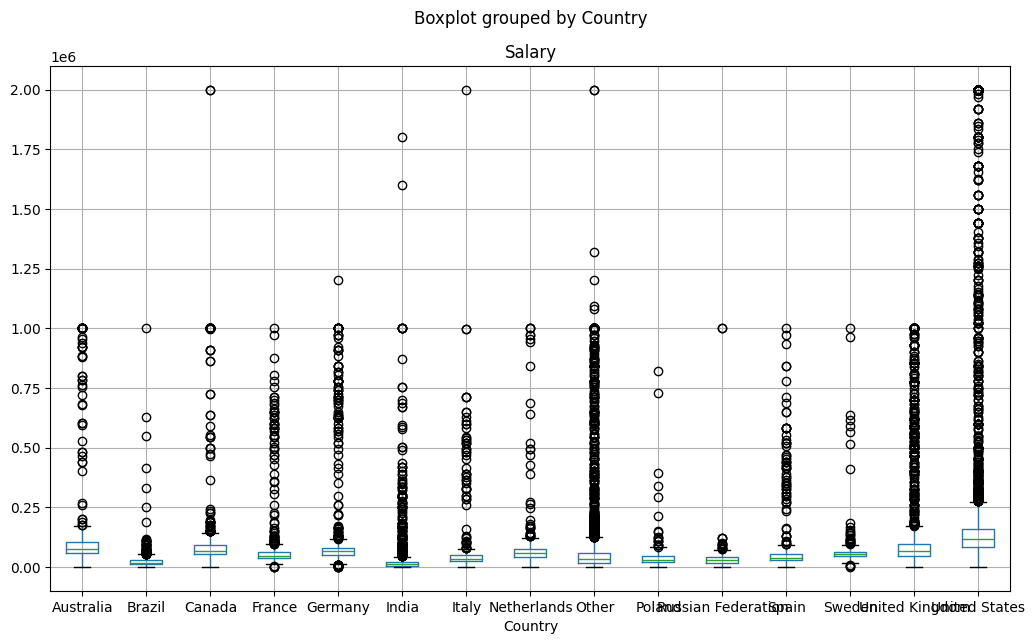

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.show()

In [19]:
df =df[df['Salary'] <= 250000]
df =df[df['Salary'] >= 10000]

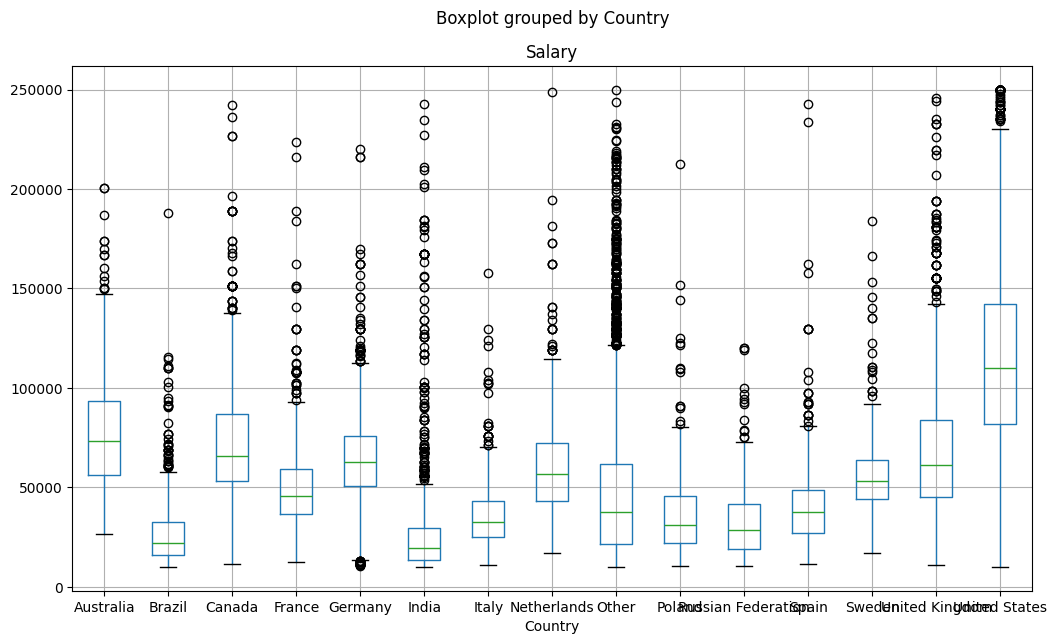

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.show()

In [21]:
df['YearsCodePro'].unique

<bound method Series.unique of 7                      13
9                       4
10                      2
11                      7
12                     20
               ...       
64129                   4
64135                   4
64148                   5
64153                   3
64154    Less than 1 year
Name: YearsCodePro, Length: 25374, dtype: str>

In [22]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [23]:
df['EdLevel'].unique()

<StringArray>
[                                      'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                                    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                             'Some college/university study without earning a degree',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                                                'Associate degree (A.A., A.S., etc.)',
                                                 'Professional degree (JD, MD, etc.)',
                                         'Other doctoral degree (Ph.D., Ed.D., etc.)',
                                             'I never completed any formal education',
                                                          'Primary/elementary school']
Length: 9, dtype: str

In [24]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [25]:
df["EdLevel"].unique()

<StringArray>
['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors', 'Post grad']
Length: 4, dtype: str

In [26]:
df.dtypes


Country             str
EdLevel             str
YearsCodePro    float64
Salary          float64
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [28]:
# lable encoding the country column
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([14, 13, 11,  7,  4,  2,  8,  6,  1,  3,  5, 12,  9,  0, 10])

In [29]:
# split x and y data
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [30]:
# create a model of regression

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

# make predictions
y_pred = linear_reg.predict(X)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [32]:
error

np.float64(38786.8413207204)

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)
y_pred= dec_tree_reg.predict(X)


In [34]:
error = np.sqrt(mean_squared_error(y, y_pred))
print('${:.2f}'.format(error))

$29867.68


In [35]:
X

,Country,EdLevel,YearsCodePro
7,14,0,13.0
9,13,2,4.0
10,13,0,2.0
11,11,1,7.0
12,7,1,20.0
...,...,...,...
64129,14,2,4.0
64135,8,0,4.0
64148,8,0,5.0
64153,8,0,3.0


In [36]:
import pickle

In [37]:
data = {'model': dec_tree_reg, 'le_country': le_country, 'le_education': le_education}
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [38]:
with open('salary_model.pkl', 'rb') as file:
    data = pickle.load(file)

dec_tree_reg = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [39]:
y_pred = dec_tree_reg.predict(X)
y_pred

array([128630.58139535,  68708.33333333,  44644.07608696, ...,
        38325.04985337,  34454.01912568,  31838.52293578], shape=(25374,))

In [1]:
import os

file_size = os.path.getsize("salary_model.pkl")
print(file_size, "bytes")


240696 bytes
